In [48]:
import sys
import pandas as pd
import numpy as np
import scipy as sp
import networkx as nx
from random import shuffle
import matplotlib.pyplot as plt

num_of_trials = 1

In [49]:
Data = pd.read_csv('large.csv')
Node_States_Num = dict(Data.T.apply(lambda x: x.nunique(), axis=1))
best_score = -sys.maxsize
best_net = nx.DiGraph()

for itern in range(num_of_trials):
    print('iteration number', itern + 1)
    
    Nodes = list(Data.columns)
    shuffle(Nodes)
    G = nx.DiGraph()
    G.add_nodes_from(Nodes)
    
    for index, i in enumerate(Nodes):
        print('completed', str(round(100*index/len(Nodes))) + "%")
        potential_parents = Nodes[:index]
        current_score = K2_score_one_node(G, Data, Node_States_Num, i)
        
        while (potential_parents):
            G.add_edge(potential_parents[0], i)
            new_score = K2_score_one_node(G, Data, Node_States_Num, i)
            if (new_score > current_score):
                current_score = new_score
            else:
                G.remove_edge(potential_parents[0], i)
            potential_parents.pop(0)
            
    new_net_score = K2_score(G, Data, Node_States_Num)
    if (new_net_score > best_score):
        best_score = new_net_score
        best_net = G.copy()

iteration number 1
completed 0%
completed 2%
completed 4%
completed 6%
completed 8%
completed 10%
completed 12%
completed 14%
completed 16%
completed 18%
completed 20%
completed 22%
completed 24%
completed 26%
completed 28%
completed 30%
completed 32%
completed 34%
completed 36%
completed 38%
completed 40%
completed 42%
completed 44%
completed 46%
completed 48%
completed 50%
completed 52%
completed 54%
completed 56%
completed 58%
completed 60%
completed 62%
completed 64%
completed 66%
completed 68%
completed 70%
completed 72%
completed 74%
completed 76%
completed 78%
completed 80%
completed 82%
completed 84%
completed 86%
completed 88%
completed 90%
completed 92%
completed 94%
completed 96%
completed 98%


In [22]:
def K2_score_one_node(graph, dataset, Node_States_Num, i):
    score = 0
    i_preds = graph.predecessors(i)
    
    if (len(i_preds) > 0):           
        Table_Nij = {}
        Table_Nijk = {}

        for index, row in dataset.iterrows():
            Conf_ij = tuple(row[i_preds])
            if Conf_ij in Table_Nij:
                Table_Nij[Conf_ij] += 1
            else:
                Table_Nij[Conf_ij] = 1

            if Conf_ij in Table_Nijk:
                if row[i] in Table_Nijk[Conf_ij]:
                    Table_Nijk[Conf_ij][row[i]] += 1
                else:
                    Table_Nijk[Conf_ij][row[i]] = 1
            else:
                Table_Nijk[Conf_ij] = {row[i]: 1}

        for j in Table_Nij:     
            SumLogNijkF = 0
            for k in Table_Nijk[j]:
                SumLogNijkF += sp.special.gammaln(Table_Nijk[j][k] + 1)

            score += (sp.special.gammaln(Node_States_Num[i]) - sp.special.gammaln(Table_Nij[j] + Node_States_Num[i]))
            score += SumLogNijkF

    else:
        SumLogNijkF = 0
        for k in range(1, Node_States_Num[i]+1):
            SumLogNijkF += sp.special.gammaln(len(dataset[dataset[i] == k]) + 1)

        score += (sp.special.gammaln(Node_States_Num[i]) - sp.special.gammaln(len(dataset[i]) + Node_States_Num[i]))
        score += SumLogNijkF    

    return score

In [23]:
def K2_score(graph, dataset, Node_States_Num):
    score = 0
    
    for i in graph.nodes_iter():        
        score += K2_score_one_node(graph, dataset, Node_States_Num, i)
            
    return score

In [53]:
for i in best_net.nodes_iter():
    for j in best_net.successors(i):
        print (i + ',' + j)

N30,N11
N30,N24
N30,N25
N10,N41
N10,N2
N10,N8
N10,N36
N10,N7
N41,N8
N37,N41
N37,N10
N37,N38
N1,N2
N1,N17
N1,N4
N1,N44
N1,N7
N1,N6
N1,N36
N1,N19
N1,N32
N1,N11
N1,N16
N1,N8
N15,N3
N15,N2
N15,N30
N15,N34
N15,N28
N15,N10
N15,N47
N15,N25
N15,N41
N15,N37
N15,N24
N15,N17
N15,N36
N15,N1
N15,N48
N15,N45
N15,N7
N15,N23
N15,N44
N15,N11
N15,N8
N7,N2
N7,N36
N7,N44
N22,N29
N22,N3
N22,N17
N22,N34
N22,N28
N22,N21
N22,N6
N22,N26
N22,N36
N22,N49
N22,N15
N22,N11
N22,N18
N22,N38
N22,N8
N31,N27
N31,N13
N31,N12
N8,N16
N8,N19
N8,N32
N8,N48
N8,N44
N8,N7
N8,N6
N8,N38
N8,N36
N3,N29
N3,N2
N3,N20
N3,N50
N3,N10
N3,N25
N3,N6
N3,N7
N3,N1
N3,N49
N3,N43
N3,N32
N3,N5
N3,N8
N3,N17
N3,N34
N3,N28
N3,N21
N3,N24
N3,N42
N3,N23
N3,N11
N3,N18
N21,N24
N21,N33
N4,N17
N4,N6
N27,N11
N27,N24
N27,N13
N27,N25
N42,N29
N42,N5
N42,N50
N42,N43
N42,N48
N42,N6
N12,N38
N23,N2
N23,N20
N23,N40
N23,N50
N23,N10
N23,N4
N23,N32
N23,N6
N23,N36
N23,N1
N23,N19
N23,N7
N23,N11
N23,N16
N23,N8
N35,N29
N35,N24
N18,N41
N29,N5
N29,N24
N29,N17
N29,N6
N29,N1

In [54]:
best_score

-267571.65255081322

C:\Users\Oleg\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Oleg\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Oleg\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Oleg\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

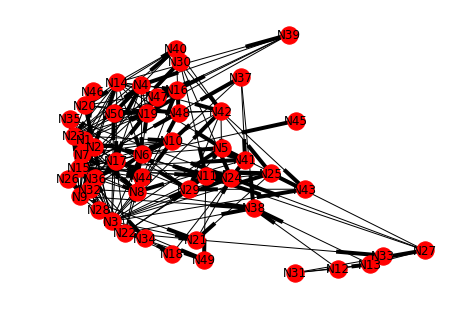

In [64]:
pos = nx.spring_layout(best_net)
nx.draw(best_net, pos)
nx.draw_networkx_labels(best_net, pos)
plt.show()